# Code:

```matlab

% Define the input matrix X and target vector T
% X represents two-dimensional input data for training, where each column corresponds to an input sample.
% Each row represents a feature (two features in this case).
X = [ -0.5 -0.5 +0.3 -0.1;  % First row represents the first input feature for each sample
      -0.5 +0.5 -0.5 +1.0]; % Second row represents the second input feature for each sample

% T represents the target outputs corresponding to the inputs in X.
% It is a binary classification problem where 1 represents one class and 0 represents another.
T = [1 1 0 0]; % Target output values for each input sample in X

% Plot the input data and target outputs in a 2D space.
% plotpv visualizes the points in the input space, showing their respective classes based on the target vector T.
plotpv(X, T);

%%

% Create a perceptron neural network
net = perceptron;

% Configure the perceptron network with the input data X and target T
% This step initializes the weights and biases based on the input data structure.
net = configure(net, X, T);

%%

% Plot the input vectors and their corresponding target outputs again
plotpv(X, T); % Visualizes the input points on the graph

% Plot the decision boundary of the perceptron
% plotpc function is used to plot the classification line or hyperplane based on the perceptron's current weights and bias.
plotpc(net.IW{1}, net.b{1}); % IW{1} represents the weights and b{1} represents the bias of the perceptron's first layer

%%

% Create expanded versions of input and target sequences for adaptation
% con2seq converts the data into a sequential format required for training
% repmat replicates the data three times to create a larger dataset for training
XX = repmat(con2seq(X), 1, 3); % Create a sequence of the input data repeated three times
TT = repmat(con2seq(T), 1, 3); % Create a sequence of the target data repeated three times

% Adapt the perceptron using the replicated input and target data
% The adapt function allows the perceptron to update its weights and bias based on the training data
net = adapt(net, XX, TT); % Adapts the network with the new data to improve the classification

% Plot the updated decision boundary of the perceptron
plotpc(net.IW{1}, net.b{1}); % Plot the new classification line after adaptation

% Explanation of linear equation ax + by + c = 0 for decision boundary
% a - net.IW{1}, representing the weights
% b - net.b{1}, representing the bias

%%

% Define a new input point to test the trained perceptron
x = [0.7; 1.2]; % New input vector to test the perceptron's prediction capability

% Calculate the output of the perceptron for the new input
y = net(x); % Pass the new input through the trained network to get the predicted output

% Plot the new input point in the input space
plotpv(x, y); % Visualizes the new input point along with its predicted output class

% Change the color of the plotted point to red for emphasis
point = findobj(gca, 'type', 'line'); % Find the most recently plotted object (the new input point)
point.Color = 'red'; % Set the color of the new input point to red to distinguish it from the training data

%%

% Hold the current plot to add more elements without erasing the existing plot
hold on;

% Re-plot the original input data and target outputs to provide context for the new point
plotpv(X, T); % Re-visualizes the original training data points
plotpc(net.IW{1}, net.b{1}); % Re-plots the decision boundary after the network's adaptation

% Release the hold on the current plot
hold off;


```

# Explanation



## Section 1

```matlab
% Define the input matrix X and target vector T
% X represents two-dimensional input data for training, where each column corresponds to an input sample.
% Each row represents a feature (two features in this case).
X = [ -0.5 -0.5 +0.3 -0.1;  % First row represents the first input feature for each sample
      -0.5 +0.5 -0.5 +1.0]; % Second row represents the second input feature for each sample

% T represents the target outputs corresponding to the inputs in X.
% It is a binary classification problem where 1 represents one class and 0 represents another.
T = [1 1 0 0]; % Target output values for each input sample in X

% Plot the input data and target outputs in a 2D space.
% plotpv visualizes the points in the input space, showing their respective classes based on the target vector T.
plotpv(X, T);
```

### Detailed Explanation:

1. **Defining the Input Matrix `X`:**
   ```matlab
   X = [ -0.5 -0.5 +0.3 -0.1;
         -0.5 +0.5 -0.5 +1.0];
   ```
   - The matrix `X` represents the input data for training the perceptron.
   - Each **column** in `X` corresponds to a single input sample, while each **row** represents a different feature (dimension) of the input data.
   - Here, we have **two features** (two rows), and **four samples** (four columns).

   Let's break down the individual elements:
   - The first row of `X` is: `[-0.5, -0.5, +0.3, -0.1]`. This represents the values for the **first feature** across all four samples.
   - The second row of `X` is: `[-0.5, +0.5, -0.5, +1.0]`. This represents the values for the **second feature** across all four samples.

   Therefore, the four input samples (as column vectors) are:
   ```
   Sample 1: [-0.5; -0.5]
   Sample 2: [-0.5; +0.5]
   Sample 3: [+0.3; -0.5]
   Sample 4: [-0.1; +1.0]
   ```

2. **Defining the Target Vector `T`:**
   ```matlab
   T = [1 1 0 0];
   ```
   - The vector `T` specifies the **target output** (class labels) for each input sample.
   - The target values are used for **binary classification**, where:
     - `1` represents **one class**, and
     - `0` represents **another class**.

   - Correspondingly, the target values for the four samples are:
     ```
     Sample 1: Target = 1
     Sample 2: Target = 1
     Sample 3: Target = 0
     Sample 4: Target = 0
     ```

   This means that the first two input samples belong to class `1`, while the last two samples belong to class `0`.

3. **Plotting the Input Data and Target Outputs:**
   ```matlab
   plotpv(X, T);
   ```
   - The `plotpv` function is used to **visualize the input data** (`X`) and the corresponding **target outputs** (`T`) in a 2D space.
   - In this function:
     - Each point in the plot represents an input sample.
     - The points are colored or marked differently to indicate the class to which they belong, based on the values in `T`.
     - For instance, points associated with a target value of `1` might be displayed as one color, while those associated with a target value of `0` might be displayed as another color.

   The plot helps to **visualize the separability** of the data, showing whether a simple linear boundary can potentially separate the classes.


## Section 2



```matlab
%% Observation (Commented Out)

% This section is another example of input data and targets, which has been commented out.
% If you uncomment it, you can observe how the perceptron behaves with a different dataset.

% X = [ -0.8 -0.5 -0.5 +0.3 -0.1;  % Modified input data for testing
%       -0.5 -0.5 +0.5 -0.5 +1.0]; % Modified second row of input features

% T = [0 1 1 0 0]; % Modified target output values

% plotpv(X, T); % Visualizes the new points in the input space with their respective classes

% Note: The above data points are not linearly separable, meaning a single straight line (decision boundary)
% cannot separate the classes perfectly. In such cases, the classical perceptron will fail to find a solution.

```

### Detailed Explanation:

#### Observation (Commented Out) Section:

This part of the code is commented out, but it provides an alternative set of input data (`X`) and corresponding target values (`T`). Here's a breakdown of this section:

1. **Alternative Input Data and Targets (Commented Out):**
   ```matlab
   % X = [ -0.8 -0.5 -0.5 +0.3 -0.1;  % Modified input data for testing
   %       -0.5 -0.5 +0.5 -0.5 +1.0]; % Modified second row of input features

   % T = [0 1 1 0 0]; % Modified target output values
   ```
   - This code defines a different input matrix `X` with **five samples** and **two features**. Each column represents a different input sample.
   - The corresponding target vector `T` contains **five target values**.
     - The target values represent a binary classification, where `0` and `1` are the two classes.

2. **Plotting the Alternative Input Data and Targets (Commented Out):**
   ```matlab
   % plotpv(X, T); % Visualizes the new points in the input space with their respective classes
   ```
   - This line, when uncommented, would visualize the alternative input data using the `plotpv` function, similar to the earlier section.
   - The points would be plotted in 2D space, color-coded according to their target values (`0` or `1`).

3. **Note on Linear Separability:**
   ```matlab
   % Note: The above data points are not linearly separable, meaning a single straight line (decision boundary)
   % cannot separate the classes perfectly. In such cases, the classical perceptron will fail to find a solution.
   ```

**Input Data (X):**
```
X = [ -0.8 -0.5 -0.5 +0.3 -0.1;
      -0.5 -0.5 +0.5 -0.5 +1.0 ];
```

This represents five data points in a 2D space:
1. (-0.8, -0.5)
2. (-0.5, -0.5)
3. (-0.5, 0.5)
4. (0.3, -0.5)
5. (-0.1, 1.0)

**Target Labels (T):**
```
T = [0 1 1 0 0];
```

The target values indicate the class labels for each corresponding data point:
1. (-0.8, -0.5) -> Class 0
2. (-0.5, -0.5) -> Class 1
3. (-0.5, 0.5) -> Class 1
4. (0.3, -0.5) -> Class 0
5. (-0.1, 1.0) -> Class 0

For linear separability, there should be a line that can separate the points labeled as Class 0 from the points labeled as Class 1.

Based on the data points and target values:
- Points (2) and (3) (both Class 1) are fairly close to points (1) and (4) (both Class 0), which could make it difficult to separate them using a single straight line.


#### Creating and Configuring the Perceptron:

```matlab

%%

% Create a perceptron neural network
net = perceptron;

% Configure the perceptron network with the input data X and target T
% This step initializes the weights and biases based on the input data structure.
net = configure(net, X, T);

```
After the commented-out section, the code creates and configures a perceptron network.

1. **Create a Perceptron Neural Network:**
   ```matlab
   net = perceptron;
   ```
   - The `perceptron` function creates a **new perceptron neural network** object.
   - A perceptron is a **simple type of neural network** that consists of a single neuron with adjustable weights and a bias. It is used for **binary classification** tasks.
   - The perceptron calculates a weighted sum of the inputs and applies a **threshold function** (usually the Heaviside step function) to decide the output (0 or 1).

2. **Configure the Perceptron Network with Input Data and Target Values:**
   ```matlab
   net = configure(net, X, T);
   ```
   - The `configure` function initializes the **weights and biases** of the perceptron based on the dimensions of the input data (`X`) and target vector (`T`).
   - Configuration is necessary before training the perceptron, as it sets up the network structure (weights, bias, and layers) to match the input data size.
     - Here, `X` provides the number of input features (2 in this case), and `T` specifies the output targets (binary values).


## Section 3

```matlab
%%

% Plot the input vectors and their corresponding target outputs again
plotpv(X, T); % Visualizes the input points on the graph

% Plot the decision boundary of the perceptron
% plotpc function is used to plot the classification line or hyperplane based on the perceptron's current weights and bias.
plotpc(net.IW{1}, net.b{1}); % IW{1} represents the weights and b{1} represents the bias of the perceptron's first layer
```

### Detailed Explanation:

This section of the code deals with visualizing the initial state of the perceptron and plotting the decision boundary before training.

#### Plotting Input Data and Targets:

1. **Plot Input Data and Targets Using `plotpv`:**
   ```matlab
   plotpv(X, T); % Visualizes the input points on the graph
   ```
   - `plotpv` is a function in MATLAB that is used to **plot input vectors** (`X`) and their **corresponding target outputs** (`T`) in a 2D space.
   - In this plot:
     - Each point represents a sample from the input matrix `X`.
     - The color or shape of each point is determined by the target values in `T`.
     - For instance, points associated with a target value of `1` might appear as circles (or another symbol), while points associated with a target value of `0` might appear as crosses (or a different symbol).
   - This visualization helps us understand the distribution of the input data and their respective class labels, giving insight into how they are spread out in the feature space.

#### Plotting the Decision Boundary:

2. **Plot the Decision Boundary Using `plotpc`:**
   ```matlab
   plotpc(net.IW{1}, net.b{1}); % IW{1} represents the weights and b{1} represents the bias of the perceptron's first layer
   ```
   - `plotpc` is a function that **plots the decision boundary** of a perceptron in the input space.
   - The decision boundary is the line (or hyperplane, in higher dimensions) that the perceptron uses to separate different classes.
   - **Arguments of `plotpc`**:
     - `net.IW{1}`: This represents the **weights** of the perceptron's first layer. `IW` stands for **Input Weights**, and `{1}` indicates that we are accessing the weights of the first layer (which is the only layer in a single-layer perceptron).
     - `net.b{1}`: This represents the **bias** of the perceptron's first layer. The bias term shifts the decision boundary, making it more flexible.

3. **Understanding the Role of Weights and Bias in Decision Boundary:**
   - The **weights (`IW`)** and **bias (`b`)** determine the position and orientation of the decision boundary in the feature space.
   - The decision boundary is defined by the linear equation:
     \[
     \text{net.IW{1}} \cdot X + \text{net.b{1}} = 0
     \]
     where `X` is the input vector (sample). The decision boundary is the set of points where this equation equals zero.
   - The line plotted by `plotpc` visually divides the input space based on this equation:
     - Points on one side of the boundary are classified into one class (e.g., `1`).
     - Points on the other side are classified into the other class (e.g., `0`).

4. **What This Visualization Represents:**
   - The plot shows the initial state of the perceptron before any training or adaptation has occurred.
   - The decision boundary plotted here is based on the perceptron’s **initial weights and bias**, which were set during the `configure` step in the previous section.
   - Since the perceptron has not been trained yet, this decision boundary may not separate the input data accurately.



## Section 4

```matlab
%%

% Create expanded versions of input and target sequences for adaptation
% con2seq converts the data into a sequential format required for training
% repmat replicates the data three times to create a larger dataset for training
XX = repmat(con2seq(X), 1, 3); % Create a sequence of the input data repeated three times
TT = repmat(con2seq(T), 1, 3); % Create a sequence of the target data repeated three times

% Adapt the perceptron using the replicated input and target data
% The adapt function allows the perceptron to update its weights and bias based on the training data
net = adapt(net, XX, TT); % Adapts the network with the new data to improve the classification

% Plot the updated decision boundary of the perceptron
plotpc(net.IW{1}, net.b{1}); % Plot the new classification line after adaptation

% Explanation of linear equation ax + by + c = 0 for decision boundary
% a - net.IW{1}, representing the weights
% b - net.b{1}, representing the bias
```

### Detailed Explanation:

This section of the code focuses on adapting (training) the perceptron using the input data and updating the decision boundary based on the adapted weights and bias.

#### Step 1: Creating Expanded Versions of Input and Target Sequences

1. **Convert Data to Sequential Format Using `con2seq`:**
   ```matlab
   XX = repmat(con2seq(X), 1, 3); % Create a sequence of the input data repeated three times
   TT = repmat(con2seq(T), 1, 3); % Create a sequence of the target data repeated three times
   ```
   - The `con2seq` function converts the data into a **cell array sequence format**, which is required by the **adaptive learning algorithm** in MATLAB.
     - `con2seq(X)` converts the input matrix `X` into a sequence format that the perceptron can use for training.
     - `con2seq(T)` similarly converts the target vector `T` into a sequence.

2. **Replicate the Data Using `repmat`:**
   - The `repmat` function **replicates the sequences three times**, creating a larger dataset.
   - This means that the input sequence `XX` now contains three copies of the original sequence of `X`, and the target sequence `TT` contains three copies of `T`.
   - **Why replicate the data?**
     - Replicating the data multiple times allows the perceptron to **adapt to the same patterns** repeatedly, improving the training process.
     - Repeating the training data helps the perceptron **reinforce the learned patterns** and increases the likelihood of finding a decision boundary that can classify the data correctly.


#### Step 2: Adapting the Perceptron Using the Expanded Data

3. **Adapt the Perceptron Using the `adapt` Function:**
   ```matlab
   net = adapt(net, XX, TT); % Adapts the network with the new data to improve the classification
   ```
   - The `adapt` function in MATLAB **updates the weights and bias** of the perceptron based on the input sequence `XX` and the target sequence `TT`.
   - This function performs **online learning** (or sequential learning), where the perceptron updates its weights and biases incrementally with each data point.
     - Unlike batch training, where all data is presented at once, online learning updates the network with each individual data point.
   - The `adapt` function continues updating the perceptron's weights and bias until it has passed through all the data in the sequences `XX` and `TT` (which were replicated three times).

4. **Significance of Adaptation:**
   - The adaptation process aims to **minimize the classification error** by adjusting the perceptron's parameters (weights and bias).
   - The network tries to find a **better decision boundary** that can correctly classify the input samples according to the target values.
   - After this process, the perceptron's decision boundary may have shifted to more accurately separate the two classes.




##### **Why data is repeated three times**

- This is part of training.
- When the adapt function is called with the replicated data, it processes each input-target pair sequentially.
- Since the original dataset is repeated three times, the perceptron will see all the training samples three times in total.
- Thus, the training process effectively performs three epochs, as the perceptron is exposed to the entire dataset three times.
- The code **performs 3 epochs** of training. Each epoch represents one full pass through the original dataset, and since the dataset is replicated three times, the perceptron will process the complete dataset three times during the adaptation phase.



#### Step 3: Plotting the Updated Decision Boundary

5. **Plot the Updated Decision Boundary:**
   ```matlab
   plotpc(net.IW{1}, net.b{1}); % Plot the new classification line after adaptation
   ```
   - After adapting the perceptron, the weights (`IW{1}`) and bias (`b{1}`) are updated.
   - The `plotpc` function is used again to **plot the new decision boundary** based on the updated weights and bias.
   - The new decision boundary is **recalculated** using the updated equation:
     \[
     \text{net.IW{1}} \cdot X + \text{net.b{1}} = 0
     \]
     where:
     - `net.IW{1}` represents the updated weights.
     - `net.b{1}` represents the updated bias.
   - This new decision boundary represents the perceptron's current classification rule, which should be improved compared to the initial state.

#### Explanation of the Linear Equation for the Decision Boundary

6. **Understanding the Equation `ax + by + c = 0`:**
   - In the context of the perceptron:
     - `a` corresponds to `net.IW{1}(1)`, the weight associated with the first input feature.
     - `b` corresponds to `net.IW{1}(2)`, the weight associated with the second input feature.
     - `c` corresponds to `net.b{1}`, the bias term.
   - This linear equation defines the **decision boundary**, and the perceptron classifies inputs based on which side of the boundary they lie:
     - If `ax + by + c > 0`, the perceptron outputs one class (e.g., `1`).
     - If `ax + by + c < 0`, the perceptron outputs the other class (e.g., `0`).


## Section 5

```matlab
%%

% Define a new input point to test the trained perceptron
x = [0.7; 1.2]; % New input vector to test the perceptron's prediction capability

% Calculate the output of the perceptron for the new input
y = net(x); % Pass the new input through the trained network to get the predicted output

% Plot the new input point in the input space
plotpv(x, y); % Visualizes the new input point along with its predicted output class

% Change the color of the plotted point to red for emphasis
point = findobj(gca, 'type', 'line'); % Find the most recently plotted object (the new input point)
point.Color = 'red'; % Set the color of the new input point to red to distinguish it from the training data
```

### Explanation:

This section of the code focuses on testing the trained perceptron by providing a new input point, predicting its class, and then visualizing the result on the existing plot.

#### Step 1: Define a New Input Point for Testing

1. **Define a New Input Vector:**
   ```matlab
   x = [0.7; 1.2]; % New input vector to test the perceptron's prediction capability
   ```
   - A new input vector `x` is defined with two elements: `[0.7; 1.2]`.
     - The first element, `0.7`, corresponds to the **first feature**.
     - The second element, `1.2`, corresponds to the **second feature**.
   - This new input point is not part of the original training data, making it a good candidate for testing the generalization ability of the trained perceptron.
   - The goal is to **predict the class label** (either 0 or 1) for this new input using the trained perceptron.

#### Step 2: Predict the Output for the New Input

2. **Calculate the Perceptron's Output for the New Input:**
   ```matlab
   y = net(x); % Pass the new input through the trained network to get the predicted output
   ```
   - The trained perceptron (`net`) is used to **predict the output** for the new input `x`.
   - The perceptron performs the following steps internally:
     - **Compute the weighted sum** of the inputs:
       \[
       \text{weighted\_sum} = \text{net.IW{1}} \cdot x + \text{net.b{1}}
       \]
       where `net.IW{1}` is the weight matrix and `net.b{1}` is the bias.
     - **Apply the activation function** (usually a step function) to the weighted sum to determine the output class:
       - If the weighted sum is greater than or equal to 0, the output is `1`.
       - If the weighted sum is less than 0, the output is `0`.
   - The result is stored in `y`, representing the **predicted class** for the input `x`.

#### Step 3: Plot the New Input Point with Its Predicted Output

3. **Plot the New Input Point in the Input Space:**
   ```matlab
   plotpv(x, y); % Visualizes the new input point along with its predicted output class
   ```
   - The `plotpv` function is used to **plot the new input point** (`x`) in the 2D space, with the color indicating the predicted class (`y`).
   - Just like the previous usage of `plotpv`, the point will be marked according to its predicted output:
     - For instance, if `y = 1`, it might appear as a circle.
     - If `y = 0`, it might appear as a cross.
   - This visualization helps to see where the new input lies in relation to the original training data and the decision boundary.

#### Step 4: Highlight the New Input Point for Emphasis

4. **Change the Color of the Plotted Point to Red:**
   ```matlab
   point = findobj(gca, 'type', 'line'); % Find the most recently plotted object (the new input point)
   point.Color = 'red'; % Set the color of the new input point to red to distinguish it from the training data
   ```
   - The `findobj` function searches for objects of type `'line'` in the current axes (`gca`), which refers to the **most recently plotted point**.
   - The code changes the **color of this point to red** to make it visually distinct from the original training data points.
     - This helps to emphasize that this point is a **test point** rather than a training point.


## Section 6

```matlab
%%

% Hold the current plot to add more elements without erasing the existing plot
hold on;

% Re-plot the original input data and target outputs to provide context for the new point
plotpv(X, T); % Re-visualize the original training data points
plotpc(net.IW{1}, net.b{1}); % Re-plots the decision boundary after the network's adaptation

% Release the hold on the current plot
hold off;
```

### Explanation:

This section is focused on improving the visualization of the perceptron's classification by updating the plot with additional information. The goal is to overlay different elements (data points, decision boundary) on the same figure to provide a clear picture of the perceptron's performance, including the original data, the decision boundary, and any newly tested input points.

#### Step 1: Hold the Current Plot

1. **Use `hold on` to Maintain the Current Plot:**
   ```matlab
   hold on;
   ```
   - The `hold on` command tells MATLAB to **retain the current plot** and **add new elements to it** without erasing the existing contents.
   - Without using `hold on`, any new plotting commands would **clear the previous plot** and start a new figure, which would lose all the previous information.
   - By enabling `hold on`, you can overlay multiple plots in the same figure, allowing for a comprehensive visualization that includes the **original training data, the decision boundary, and the newly tested input**.

#### Step 2: Re-Plot the Original Input Data and Target Outputs

2. **Plot the Original Input Data and Targets Using `plotpv`:**
   ```matlab
   plotpv(X, T); % Re-visualize the original training data points
   ```
   - This line re-plots the original input data (`X`) and their corresponding targets (`T`) using the `plotpv` function.
   - **Purpose of Re-Plotting:**
     - When a new input point is added to the plot (as done in the previous section), it may overlap with the original plot, making it difficult to distinguish between training points and the new test point.
     - Re-plotting the original data ensures that all **training points are clearly visible** on the graph.
   - **How the Points Are Displayed:**
     - The `plotpv` function will show the original training points with markers based on their class, just as in the initial plot (e.g., circles for one class and crosses for the other).
   - This step helps provide a **contextual understanding** of the original dataset relative to the new test point and the decision boundary.

#### Step 3: Plot the Updated Decision Boundary

3. **Plot the Decision Boundary Using `plotpc`:**
   ```matlab
   plotpc(net.IW{1}, net.b{1}); % Re-plots the decision boundary after the network's adaptation
   ```
   - The `plotpc` function is used to **re-plot the decision boundary** of the perceptron using the **current weights (`IW{1}`) and bias (`b{1}`)** after adaptation.
   - **Purpose of Re-Plotting the Decision Boundary:**
     - After adding new elements to the plot, such as the test point, re-plotting the decision boundary ensures that it is visible and properly reflects the **most updated state** of the perceptron's classification.
     - The new decision boundary represents the perceptron's attempt to **separate the two classes** based on the training data.
   - The line represents the **equation of the decision boundary**:
     \[
     \text{net.IW{1}} \cdot X + \text{net.b{1}} = 0
     \]
     - The weights (`IW{1}`) and bias (`b{1}`) define the position and orientation of this boundary in the input space.

#### Step 4: Release the Hold on the Current Plot

4. **Use `hold off` to Release the Plot:**
   ```matlab
   hold off;
   ```
   - The `hold off` command tells MATLAB to **stop retaining the current plot**.
   - After calling `hold off`, any subsequent plotting commands will **clear the current figure** and start a new plot.
   - This is done to **finalize the current visualization**, ensuring that all elements are added as intended.


# Demonstration

### Step 1: Define the Input Data and Target Outputs


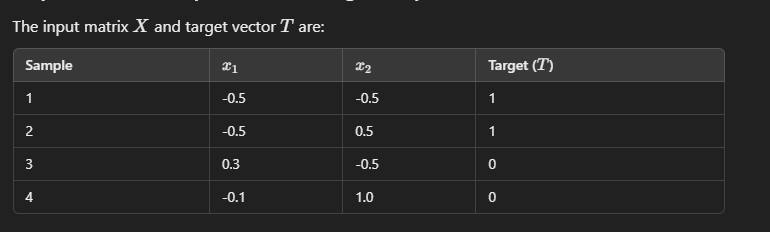

### Step 2: Initialize the Perceptron

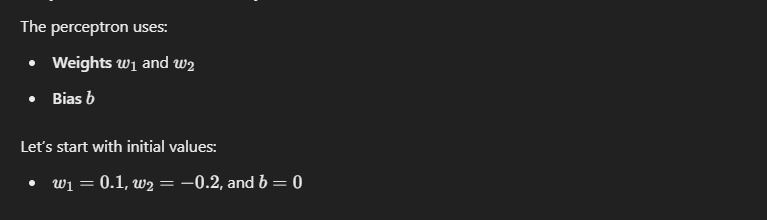

### Step 3: Training the Perceptron - Calculate the Output
For each training sample, the perceptron calculates the **weighted sum** and applies the **activation function**.



#### Mathematical Operations:

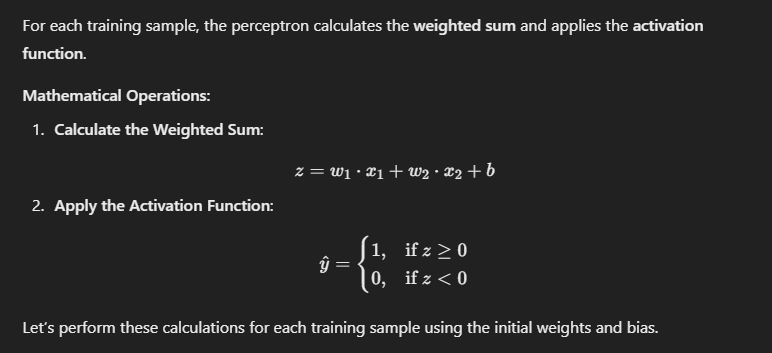

#### Calculations for Each Sample:

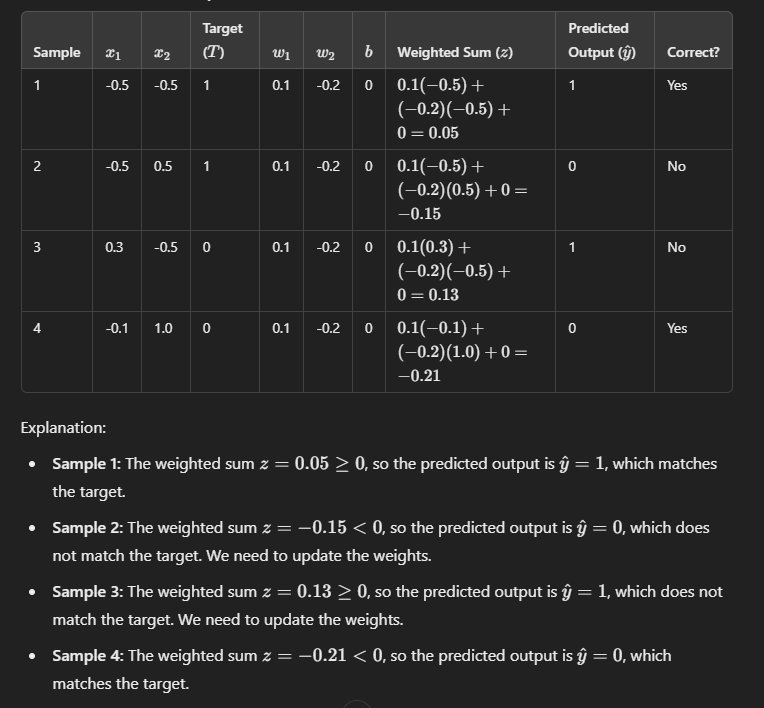

### Step 4: Update the Weights and Bias

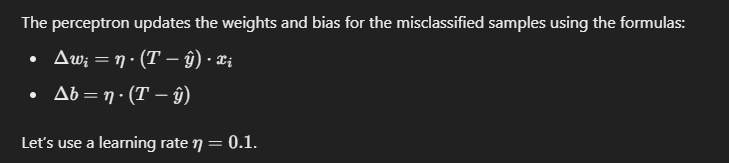


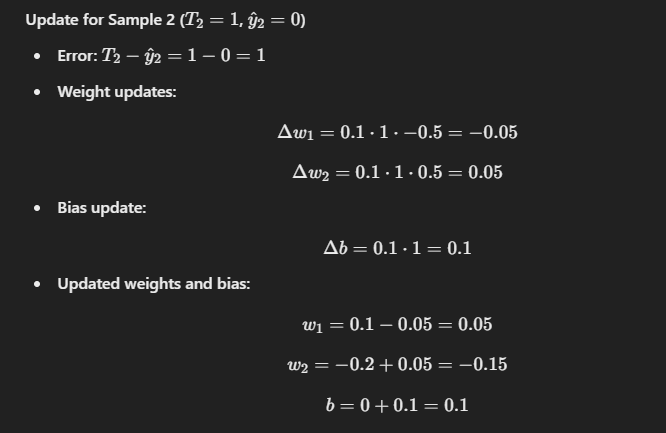

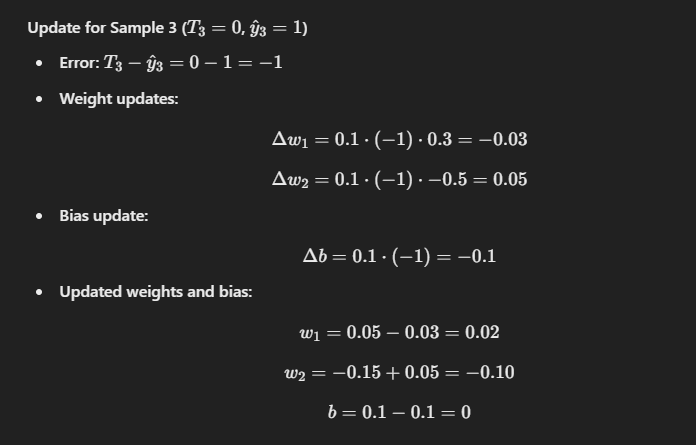

### Step 5: Test the Perceptron with a New Input

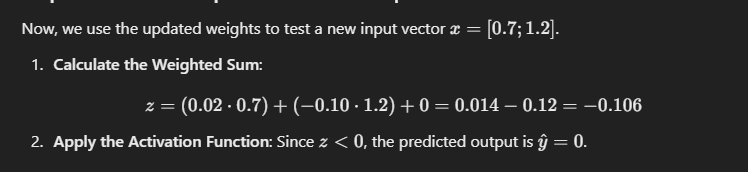



### Summary Table of Perceptron Training and Testing


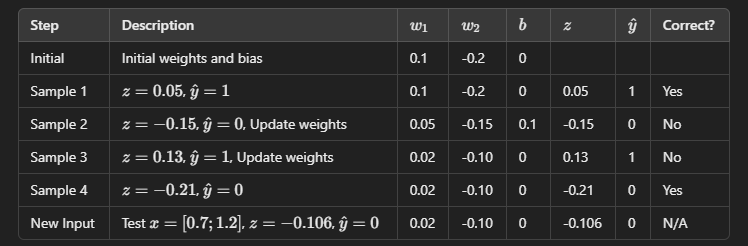